In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Ran\Berkeley\IEOR\290\Project\Data\New Data\newData1.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,ID,Birth Year,Gender Flag,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,City of profile,...,Length,Role,Dept,Location,Industry,Layoff Date,Company Name,Employees Affected,laid_off,Age
0,0,0,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,Web Development,0.874223,Software Engineering,0.075843,NaN,...,61.0,?,NaN,"milpitas, ca",Manufacturing,10/23/2015,"Western Digital Technologies, Inc.",56,0,21
1,1,1,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,Web Development,0.874223,Software Engineering,0.075843,NaN,...,61.0,?,NaN,"milpitas, ca",Manufacturing,10/24/2016,"Western Digital Technologies, Inc.",59,0,21
2,2,2,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,Web Development,0.874223,Software Engineering,0.075843,NaN,...,61.0,?,NaN,"milpitas, ca",Manufacturing,6/17/2016,"Western Digital Technologies, Inc.",71,0,21
3,3,3,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,Web Development,0.874223,Software Engineering,0.075843,NaN,...,61.0,?,NaN,"milpitas, ca",Manufacturing,7/3/2016,"Western Digital Technologies, Inc.",337,0,21
4,4,4,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,Web Development,0.874223,Software Engineering,0.075843,NaN,...,61.0,?,NaN,"milpitas, ca",Manufacturing,8/27/2018,"Western Digital Technologies, Inc.",79,0,21


In [4]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Birth Year', 'Gender Flag',
       'Skillset1', 'Skillset1 Weight', 'Skillset2', 'Skillset2 Weight',
       'City of profile', 'Country of profile', 'Education',
       'Elite Institution', 'Start Date', 'End Date', 'Length', 'Role', 'Dept',
       'Location', 'Industry', 'Layoff Date', 'Company Name',
       'Employees Affected', 'laid_off', 'Age'],
      dtype='object')

In [5]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
data['Birth Year'] = data[data['Birth Year'] != 'None']['Birth Year']
data['Birth Year'].unique()

array([1997, 2001, 1937, 1980, 1987, 1957, 1990, 1981, 1968, 1986, 1984,
       1974, 1972, 1976, 1975, 1958, 1971, 1953, 1967, 1963, 1964, 1979,
       1992, 1959, 1983, 1973, 1969, 1991, 1966, 1989, 1947, 1978, 1994,
       1970, 1962, 1985, 1993, 1996, 1950, 1988, 1955, 1982, 1977, 1965,
       1961, 1944, 1932, 1954, 1927, 1995, 1948, 1936, 1935, 1960, 1931,
       1930, 1946, 1952, 1941, 1949, 1956, 1943, 1951, 1942, 1940, 1939,
       1921, 1938, 1945, 1998, 1925, 1929, 1926, 1934, 1933, 1928, 1920,
       1919], dtype=int64)

In [6]:
data = data[~data['Birth Year'].isnull()] #Drops nan
data['Age'] = 2018 - data['Birth Year'].astype('int')

data['Gender Flag'] = data['Gender Flag'].replace({0: 'unknown', 1: 'female', 2: 'male'})
data['Education'] = data['Education'].replace({0: 'unknown', 1: 'High School', 2: 'Vocational degree', 3: 'Associates', 
                                               4: 'Bachelors', 5:'Masters', 6: 'MBA', 7: 'PhD'})
data['Length'] = data['Length']*1/30
# Categorize length in 1:'0-6 months', 2:'6-12 months', 3:'12-18 months', 4:'18-24 months', 5:'more than 2 years'
data['Length']=pd.cut(data['Length'], bins=[0, 6, 12, 18,24,1000000], 
                                             include_lowest=True, 
                                             labels=['<6mo','6-12mo','12-18mo','12-24mo','>24mo'])

# Convert Birthyear to Age in 1:'> 45 yrs old', 2:'36-45 yrs old', 3:'26-35 yrs old', 4:'< 26 yrs old'
data['Age']=pd.cut(data['Age'], bins=[0, 25, 35, 45, 100000], 
                                             include_lowest=True, 
                                             labels=['>45 yrs old','36-45 yrs old','26-35 yrs old','<26 yrs old'])

#data['Length'] = data['Length'].astype('int')

In [7]:
threshold = 5  # Remove items less than or equal to threshold
for col in data[data.columns.difference(['Age', 'Length'])]: #Cannot apply this to categorized features
    vc = data[col].value_counts()
    vals_to_remove = vc[vc <= threshold].index.values
    data[col].loc[data[col].isin(vals_to_remove)] = 0

In [8]:
data.head()

,ID,Birth Year,Gender Flag,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,City of profile,Country of profile,Education,...,Length,Role,Dept,Location,Industry,Layoff Date,Company Name,Employees Affected,laid_off,Age
0,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,male,Web Development,0.874223,Software Engineering,0.075843,NaN,United States,Bachelors,...,<6mo,?,NaN,"milpitas, ca",Manufacturing,10/23/2015,"Western Digital Technologies, Inc.",56,0,>45 yrs old
1,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,male,Web Development,0.874223,Software Engineering,0.075843,NaN,United States,Bachelors,...,<6mo,?,NaN,"milpitas, ca",Manufacturing,10/24/2016,"Western Digital Technologies, Inc.",59,0,>45 yrs old
2,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,male,Web Development,0.874223,Software Engineering,0.075843,NaN,United States,Bachelors,...,<6mo,?,NaN,"milpitas, ca",Manufacturing,6/17/2016,"Western Digital Technologies, Inc.",71,0,>45 yrs old
3,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,male,Web Development,0.874223,Software Engineering,0.075843,NaN,United States,Bachelors,...,<6mo,?,NaN,"milpitas, ca",Manufacturing,7/3/2016,"Western Digital Technologies, Inc.",337,0,>45 yrs old
4,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,male,Web Development,0.874223,Software Engineering,0.075843,NaN,United States,Bachelors,...,<6mo,?,NaN,"milpitas, ca",Manufacturing,8/27/2018,"Western Digital Technologies, Inc.",79,0,>45 yrs old


In [9]:
master = data[data['Education'] == 'Masters']
MBA = data[data['Education'] == 'MBA']

master_not_laid_off = master[master['laid_off'] == 0]
master_laid_off = master[master['laid_off'] == 1]

MBA_not_laid_off = MBA[MBA['laid_off'] == 0]
MBA_laid_off = MBA[MBA['laid_off'] == 1]

In [10]:
print(master.shape)
print(MBA.shape)
print(master_laid_off.shape)
print(MBA_laid_off.shape)

(13725, 23)
(11967, 23)
(1239, 23)
(705, 23)


In [11]:
data = pd.concat([master, MBA], axis = 0)

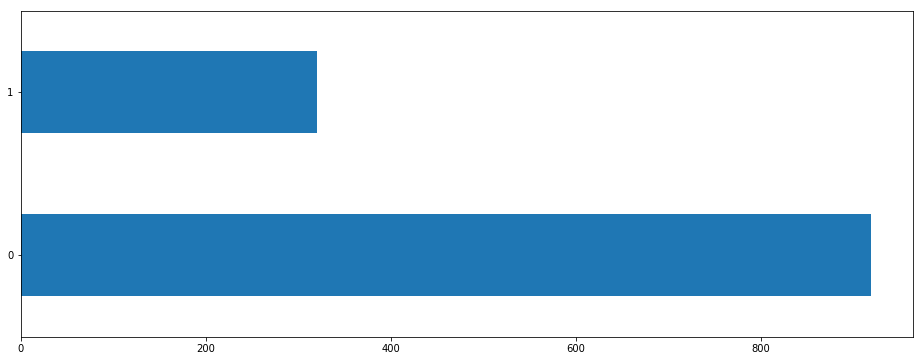

In [12]:
pd.value_counts(master_laid_off['Elite Institution']).plot.barh(figsize = (16,6))

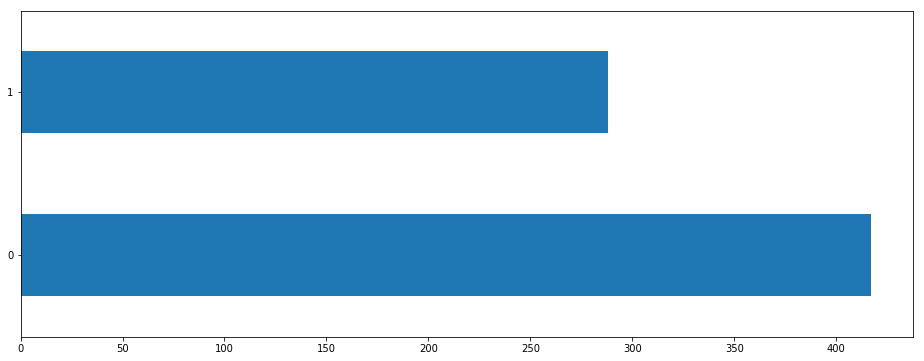

In [13]:
pd.value_counts(MBA_laid_off['Elite Institution']).plot.barh(figsize = (16,6))

### ML

In [14]:
data = pd.read_csv(r'C:\Ran\Berkeley\IEOR\290\Project\Data\New Data\newData2.csv')

In [15]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis = 1)
data.head()

,ID,Birth Year,Gender Flag,Skillset1 Weight,Skillset2 Weight,City of profile,Country of profile,Education,Elite Institution,Start Date,...,s2-Product Management,s2-Public Policy,s2-Real Estate,s2-Retail and Fashion,s2-Sales,s2-Social Media and Communications,s2-Software Engineering,s2-Video and Film Production,s2-Web Design,s2-Web Development
0,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,0.874223,0.075843,NaN,United States,4,0,6/1/2017,...,0,0,0,0,0,0,1,0,0,0
1,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,0.874223,0.075843,NaN,United States,4,0,6/1/2017,...,0,0,0,0,0,0,1,0,0,0
2,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,0.874223,0.075843,NaN,United States,4,0,6/1/2017,...,0,0,0,0,0,0,1,0,0,0
3,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,0.874223,0.075843,NaN,United States,4,0,6/1/2017,...,0,0,0,0,0,0,1,0,0,0
4,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,0.874223,0.075843,NaN,United States,4,0,6/1/2017,...,0,0,0,0,0,0,1,0,0,0


In [16]:
master = data[data['Education'] == 5]
MBA = data[data['Education'] == 6]

master_not_laid_off = master[master['laid_off'] == 0]
master_laid_off = master[master['laid_off'] == 1]

MBA_not_laid_off = MBA[MBA['laid_off'] == 0]
MBA_laid_off = MBA[MBA['laid_off'] == 1]

In [17]:
#Making balanced training dataset
np.random.seed(101)
master_not_laid_off = master_not_laid_off.sample(n=2000) 
master = pd.concat([master_not_laid_off, master_laid_off])

In [18]:
np.random.seed(101)
MBA_not_laid_off = MBA_not_laid_off.sample(n=1000) 
MBA = pd.concat([MBA_not_laid_off, MBA_laid_off])

In [19]:
# Reserve 20% for testing
from sklearn import model_selection

y1 = master['laid_off']
X1 = master.drop(['Length', 'ID','Birth Year','City of profile', 'Country of profile',
                   'Start Date','End Date','Role', 'Dept', 'Company Name',
                   'Location','Industry','laid_off','Layoff Date', 'Employees Affected'],axis = 1)
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X1, y1, test_size=0.2,random_state=101)

print('training data has %d observation with %d features'% X1_train.shape)
print('test data has %d observation with %d features'% X1_test.shape)

training data has 2591 observation with 70 features
test data has 648 observation with 70 features


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X1_train, y1_train)
RF.score(X1_test,y1_test)

0.7669753086419753

In [22]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [23]:
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

print_grid_search_metrics(Grid_RF)

Best score: 0.752
Best parameters set:
	n_estimators: 40


In [24]:
importances = RF.feature_importances_
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X1.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
Age: 0.1943
Skillset2 Weight: 0.1885
Skillset1 Weight: 0.1833
Gender Flag: 0.0515
Elite Institution: 0.0292
s1-Electrical Engineering: 0.0204
s2-Software Engineering: 0.0178
s2-Sales: 0.0168
s2-IT Management and Support: 0.0165
s2-Electrical Engineering: 0.0133
s1-Web Development: 0.0132
s1-Software Engineering: 0.0127
s1-Sales: 0.012
s2-Administration: 0.0116
s1-Mobile Telecommunications: 0.0107
s1-Product Management: 0.0105
s2-Product Management: 0.0102
s2-Mobile Telecommunications: 0.01
s2-Web Development: 0.0097
s2-Human Resources: 0.0093
s1-Human Resources: 0.0093
s1-Operations Management: 0.0087
s2-Business Development: 0.0081
s1-Finance: 0.008
s2-Manufacturing and Process Management: 0.0076
s1-Healthcare: 0.0071
s2-Data Analysis: 0.0068
s1-IT Management and Support: 0.0066
s2-Finance: 0.0064
s1-Manufacturing and Process Management: 0.0057
s1-Social Media and Communications: 0.0055
s2-Operations Management: 0.0054
s1-Administrati

In [25]:
# Lasso regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X1_train, y1_train)
LR.score(X1_test, y1_test)

0.6682098765432098

In [26]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
print_grid_search_metrics(Grid_LR)

Best score: 0.646
Best parameters set:
	C: 1
	penalty: 'l2'


In [28]:
best_LR_model = Grid_LR.best_estimator_

In [29]:
best_LR_model.fit(X1_train, y1_train)

scaler = StandardScaler()
X_l2 = scaler.fit_transform(X1)
best_LR_model.fit(X_l2, y1)
best_LR_model.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), best_LR_model.coef_[0]), \
                      X1.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
s2-Healthcare: -0.2305
Age: -0.229
s1-Healthcare: -0.2178
s1-Electrical Engineering: 0.2129
s1-Manufacturing and Process Management: -0.2019
s1-Social Media and Communications: 0.1748
s2-Electrical Engineering: 0.173
s1-Human Resources: -0.1613
s1-Sales: -0.1483
Gender Flag: -0.131
s2-Logistics: 0.1294
s2-Software Engineering: 0.1294
s1-Web Development: 0.1266
s1-Musical Production: 0.1241
s1-IT Management and Support: 0.1023
s1-Data Analysis: 0.0938
s1-Military: -0.093
s2-Hospitality: 0.0924
s2-Business Development: 0.0853
s1-Insurance: -0.0834
s2-Military: -0.0817
s2-Administration: -0.0766
s2-IT Management and Support: -0.0739
s1-Operations Management: 0.0737
s2-Energy, Oil, and Gas: -0.0717
s2-Real Estate: -0.0716
s2-Insurance: 0.0648
s1-Industrial Management: 0.0642
s2-Operations Management: -0.061
Skillset2 Weight: -0.0579
s2-Retail and Fashion: 0.0576
s2-Digital Marketing: -0.0523
s1-Software Engineering: 0.0521
s1-Non-Profit and Community: 

### MBA

In [41]:
# Reserve 20% for testing
from sklearn import model_selection

y2 = MBA['laid_off']
X2 = MBA.drop(['Length', 'ID','Birth Year','City of profile', 'Country of profile',
                   'Start Date','End Date','Role', 'Dept', 'Company Name',
                   'Location','Industry','laid_off','Layoff Date', 'Employees Affected'],axis = 1)
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X2, y2, test_size=0.2,random_state=101)

print('training data has %d observation with %d features'% X2_train.shape)
print('test data has %d observation with %d features'% X2_test.shape)

training data has 1364 observation with 70 features
test data has 341 observation with 70 features


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X2_train, y2_train)
RF.score(X2_test,y2_test)

from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X2_train, y2_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [44]:
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

print_grid_search_metrics(Grid_RF)

Best score: 0.727
Best parameters set:
	n_estimators: 80


In [45]:
importances = RF.feature_importances_
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X2.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
Skillset1 Weight: 0.1861
Skillset2 Weight: 0.1846
Age: 0.1656
Gender Flag: 0.0577
Elite Institution: 0.03
s1-Finance: 0.0215
s1-Sales: 0.0214
s2-Sales: 0.0212
s2-Finance: 0.02
s1-Product Management: 0.0174
s2-Product Management: 0.0173
s2-Administration: 0.0151
s2-Business Development: 0.0148
s2-Mobile Telecommunications: 0.0123
s1-Electrical Engineering: 0.012
s1-Business Development: 0.012
s1-Administration: 0.012
s2-Operations Management: 0.0118
s1-Digital Marketing: 0.0118
s1-Mobile Telecommunications: 0.01
s2-Human Resources: 0.0083
s2-Software Engineering: 0.0081
s2-Electrical Engineering: 0.0077
s2-Retail and Fashion: 0.0074
s1-Operations Management: 0.0073
s1-Software Engineering: 0.0072
s1-Logistics: 0.0072
s2-Manufacturing and Process Management: 0.0064
s1-Human Resources: 0.0064
s2-Logistics: 0.0062
s2-Digital Marketing: 0.006
s2-Healthcare: 0.0059
s1-Web Development: 0.0058
s1-Healthcare: 0.0057
s2-IT Management and Support

In [46]:
LR = LogisticRegression()
LR.fit(X2_train, y2_train)
LR.score(X2_test, y2_test)

0.6158357771260997

In [47]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X2_train, y2_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
print_grid_search_metrics(Grid_LR)

Best score: 0.617
Best parameters set:
	C: 5
	penalty: 'l2'


In [49]:
best_LR_model = Grid_LR.best_estimator_

In [50]:
best_LR_model.fit(X2_train, y2_train)

scaler = StandardScaler()
X_l2 = scaler.fit_transform(X2)
best_LR_model.fit(X_l2, y2)
best_LR_model.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), best_LR_model.coef_[0]), \
                      X2.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
Skillset1 Weight: -0.3453
s2-Legal: -0.2935
s2-Real Estate: -0.2316
Age: -0.1897
s1-Video and Film Production: 0.1854
s1-Sales: -0.1767
s1-Electrical Engineering: 0.1731
s1-Design: -0.1632
s1-Web Development: 0.1617
s1-Insurance: 0.156
s1-Energy, Oil, and Gas: 0.1543
s2-Healthcare: -0.1539
s2-Musical Production: 0.1528
s1-Industrial Management: 0.1483
Skillset2 Weight: -0.1467
s2-Military: 0.1443
s2-Operations Management: 0.1292
s1-Data Analysis: 0.1201
s2-Sales: -0.1075
s1-Software Engineering: 0.1062
s1-Operations Management: -0.1025
Gender Flag: -0.1018
s1-Healthcare: -0.1007
s2-Mobile Telecommunications: -0.0987
s2-Finance: 0.0947
s1-Web Design: 0.0935
s1-Digital Marketing: 0.0885
Elite Institution: 0.0837
s1-Human Resources: -0.0802
s1-Logistics: 0.078
s2-Human Resources: 0.0746
s1-Finance: 0.0718
s2-Non-Profit and Community: 0.0679
s1-IT Management and Support: -0.0659
s2-Retail and Fashion: 0.0635
s2-Web Design: -0.0632
s2-Manufacturing and 

### Control the Age parameter because they both contribute negatively towards the probability of being laid off or not

Text(0.5, 1.0, 'MBA')

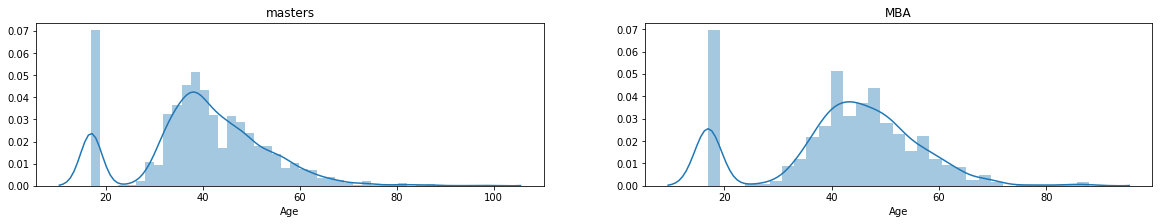

In [54]:
fig, axs = plt.subplots(ncols=2,figsize=(20,3))
sns.distplot(master['Age'], ax=axs[0]).set_title('masters')
sns.distplot(MBA['Age'], ax=axs[1]).set_title('MBA')

In [58]:
MBA_laid_off['Age'].mean()

40.54751773049645